In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# POP Dataset

In [2]:
df = pd.read_csv('POP.csv')

In [3]:
df.head()

,realtime_start,value,date,realtime_end
0,12/6/2019,156309.0,1/1/1952,12/6/2019
1,12/6/2019,156527.0,2/1/1952,12/6/2019
2,12/6/2019,156731.0,3/1/1952,12/6/2019
3,12/6/2019,156943.0,4/1/1952,12/6/2019
4,12/6/2019,157140.0,5/1/1952,12/6/2019


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  816 non-null    object 
 1   value           816 non-null    float64
 2   date            816 non-null    object 
 3   realtime_end    816 non-null    object 
dtypes: float64(1), object(3)
memory usage: 25.6+ KB


In [5]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

In [6]:
# df = df['value'].resample('Y').mean()

<Axes: xlabel='date'>

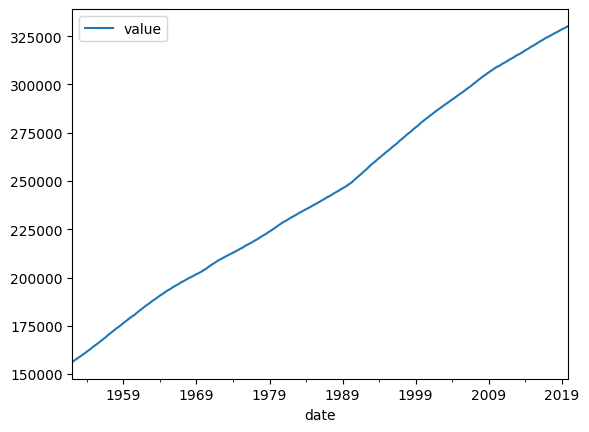

In [7]:
df.plot()

In [8]:
df

,value
date,
1952-01-01,156309.000
1952-02-01,156527.000
1952-03-01,156731.000
1952-04-01,156943.000
1952-05-01,157140.000
...,...
2019-08-01,329591.333
2019-09-01,329785.872
2019-10-01,329982.035


## Moving Average

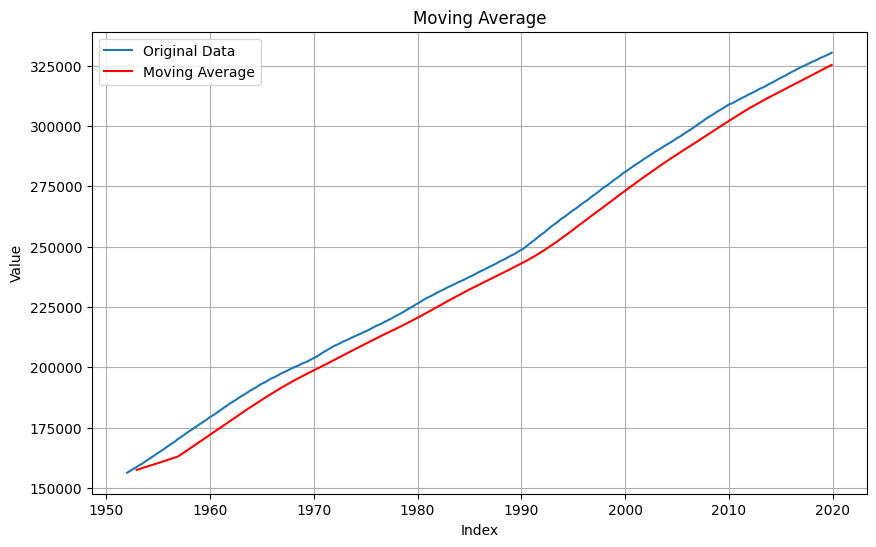

Bias: -6170.247026982427
Mean Absolute Error: 6170.247026982427
Root Mean Squared Error: 6277.363566109505
Mean Squared Error: 39405293.341119036
Mean Absolute Percentage Error: 2.600973424268544
Prediction Accuracy: 97.46963153200329


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
df = pd.read_csv('POP.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

def bias(actual, predicted):
    return np.mean(predicted - actual)

def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(predicted - actual))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((predicted - actual)**2))

def mean_squared_error(actual, predicted):
    return np.mean((predicted - actual)**2)

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def prediction_accuracy(actual, predicted):
    return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100


# Calculate moving average
window_size = 60 
moving_avg = df['value'].rolling(window=window_size, min_periods=12).mean()

# Plot original data and moving average
plt.figure(figsize=(10, 6))
plt.plot(df['value'], label='Original Data')
plt.plot(moving_avg, color='red', label='Moving Average')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Moving Average')
plt.legend()
plt.grid(True)
plt.show()

# Calculating metrics
actual_value = df['value']
predicted_value = moving_avg
bias_value = bias(actual_value, predicted_value)
print("Bias:", bias_value)

mae = mean_absolute_error(actual_value, predicted_value)
print("Mean Absolute Error:", mae)

rmse = root_mean_squared_error(actual_value, predicted_value)
print("Root Mean Squared Error:", rmse)

mse = mean_squared_error(actual_value, predicted_value)
print("Mean Squared Error:", mse)

mape = mean_absolute_percentage_error(actual_value, predicted_value)
print("Mean Absolute Percentage Error:", mape)

accuracy = prediction_accuracy(actual_value, predicted_value)
print("Prediction Accuracy:", accuracy)

## Exponential Smoothing 

In [10]:
df = pd.read_csv('POP.csv')

In [11]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

In [12]:
train=df[0:-60] 
test=df[-60:]

In [13]:
print(train.shape)
print(test.shape)

(756, 1)
(60, 1)


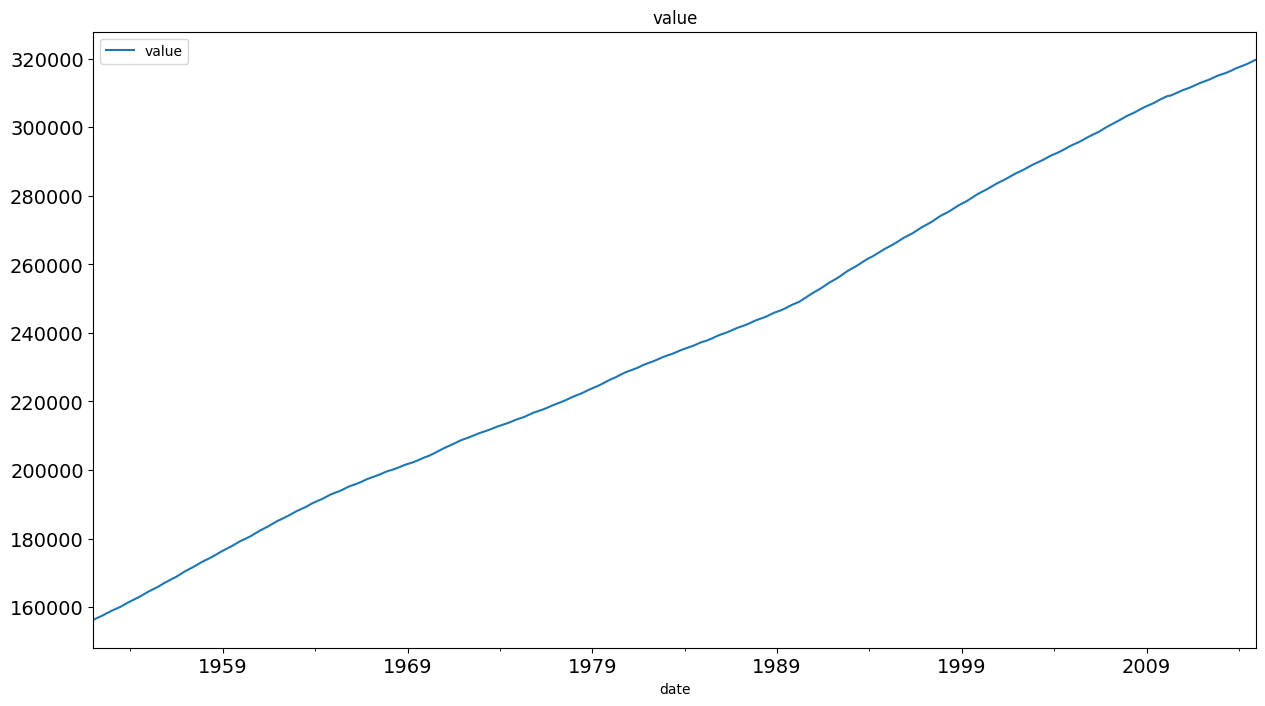

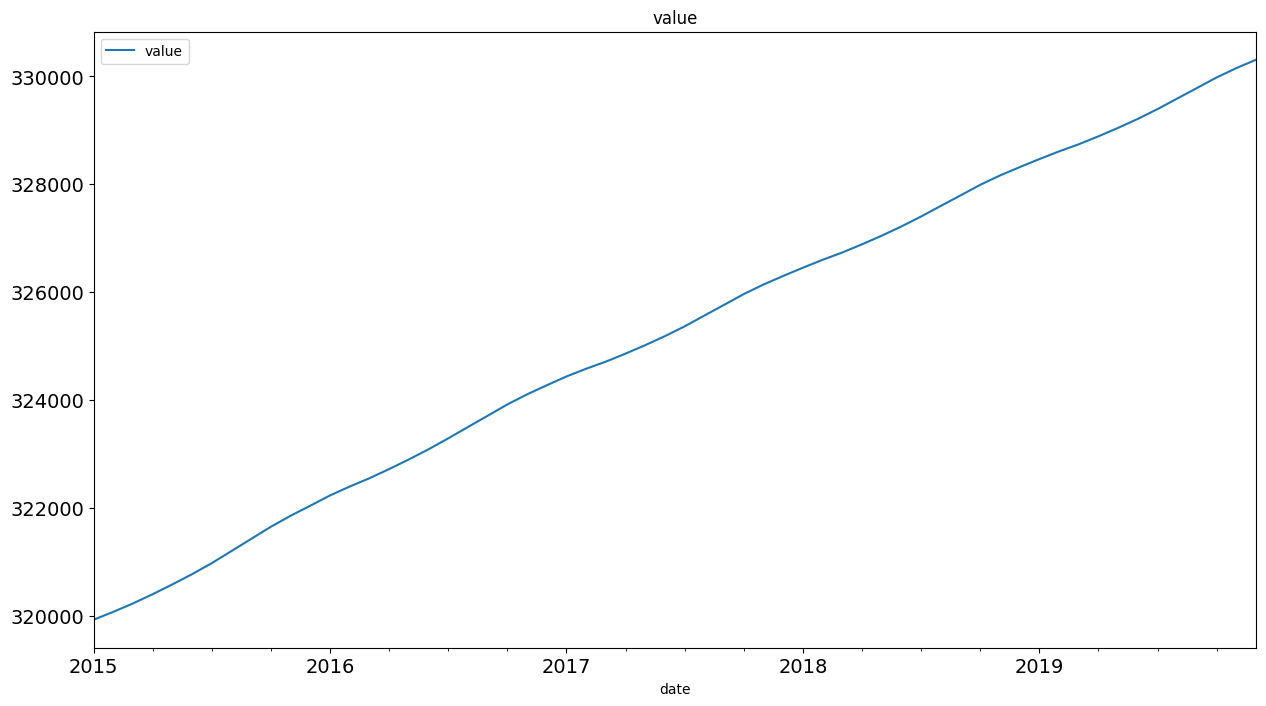

In [14]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'value', fontsize=14)
test.plot(figsize=(15,8), title= 'value', fontsize=14)
plt.show()

### DES

C:\Users\simra\AppData\Local\Temp\ipykernel_14668\3423228849.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level = 0.3,smoothing_slope = 0.4)
C:\Users\simra\Anaconda3\envs\DAB200\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


MAE 1,096.96
MSE 1,727,576.81
RMSE 1,314.37
Mean Absolute Percentage Error: 0.3352668719664364
Prediction Accuracy: 99.66271844074458


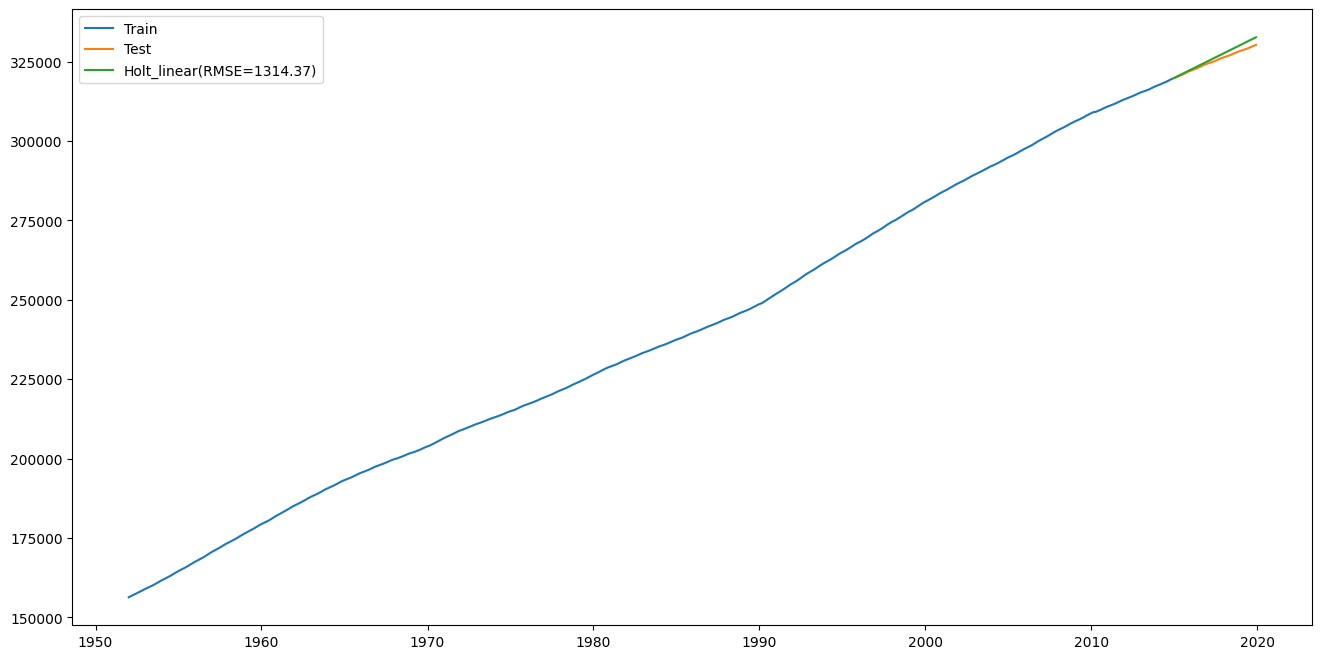

In [15]:
# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level = 0.3,smoothing_slope = 0.4)
pred['Holt_linear'] = fit1.forecast(len(test))
# Calculate KPI
mae = mean_absolute_error(test.value, pred.Holt_linear)
mse=mean_squared_error(test.value, pred.Holt_linear)
rmse = sqrt(mean_squared_error(test.value, pred.Holt_linear))
mape = mean_absolute_percentage_error(test.value, pred.Holt_linear)
accuracy = prediction_accuracy(test.value, pred.Holt_linear)

print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
print("Mean Absolute Percentage Error:", mape)
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear(RMSE={:.2f})'.format(rmse))
print("Prediction Accuracy:", accuracy)
plt.legend()
plt.show()

## Linear Regression

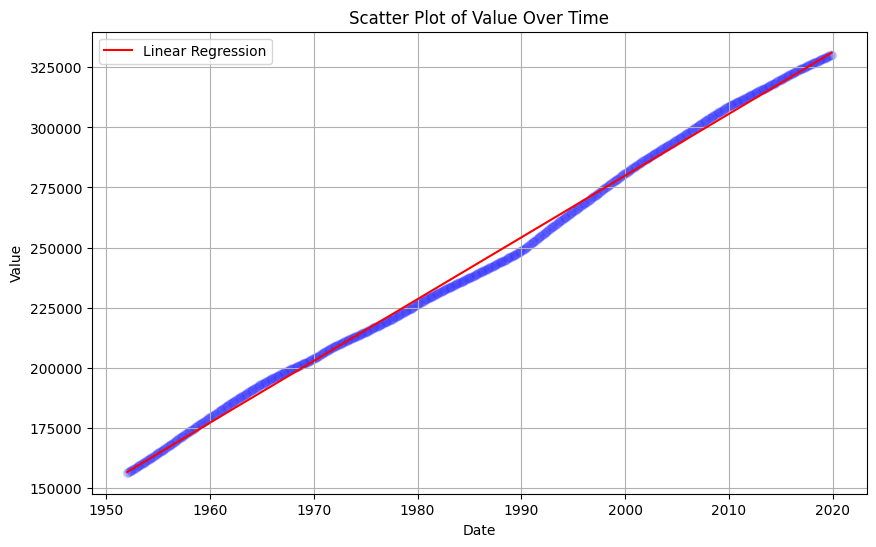

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming your data is stored in a CSV file
data = pd.read_csv('POP.csv')

# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Convert datetime to timestamp
data['timestamp'] = data['date'].apply(lambda x: x.timestamp())

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['date'], data['value'], color='blue', alpha=0.1)
plt.title('Scatter Plot of Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model
model.fit(data[['timestamp']], data['value'])

# Predicting values
predictions = model.predict(data[['timestamp']])

# Plot the regression line
plt.plot(data['date'], predictions, color='red', label='Linear Regression')

plt.legend()
plt.show()

C:\Users\simra\Anaconda3\envs\DAB200\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted mean values for the next 5 years:
Year 2020: 332472.4987607915
Year 2021: 335041.33154151123
Year 2022: 337610.16432223003
Year 2023: 340178.99710294884
Year 2024: 342747.8298836686

KPIs:
Mean Absolute Error (MAE): 2094.374769944039
Bias: -2.9103830456733704e-11
Squared Mean Error (SME): 6238776.615540971
Root Squared Mean Error (RSME): 2497.75431448751
Mean Absolute Percentage Error (MAPE): 0.8789395751623056
Prediction Accuracy (PA): 99.14111382334299


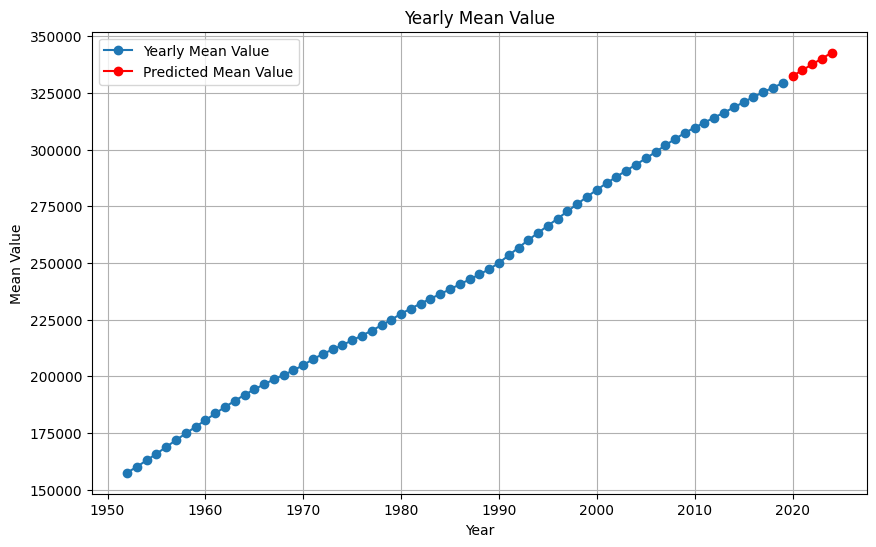

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime, timedelta

# Load data from CSV
data = pd.read_csv('POP.csv')

# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract year from date
data['year'] = data['date'].dt.year

# Calculate mean value for each year
yearly_mean = data.groupby('year')['value'].mean().reset_index()

# Plot the yearly mean values
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean['year'], yearly_mean['value'], marker='o', linestyle='-', label='Yearly Mean Value')
plt.title('Yearly Mean Value')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.grid(True)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model
model.fit(yearly_mean[['year']], yearly_mean['value'])

# Predicting mean values for the next 5 years
last_year = yearly_mean['year'].max()
next_years = pd.Series(range(last_year + 1, last_year + 6))
next_yearly_mean = model.predict(next_years.values.reshape(-1, 1))

# Plot predicted mean values for the next 5 years
plt.plot(next_years, next_yearly_mean, marker='o', linestyle='-', color='red', label='Predicted Mean Value')

# Print predicted mean values for the next 5 years
print("Predicted mean values for the next 5 years:")
for year, value in zip(next_years, next_yearly_mean):
    print(f"Year {int(year)}: {value}")

# Calculate KPIs
predictions = model.predict(yearly_mean[['year']])
mae = mean_absolute_error(yearly_mean['value'], predictions)
bias = predictions.mean() - yearly_mean['value'].mean()
sme = mean_squared_error(yearly_mean['value'], predictions)
rsme = mean_squared_error(yearly_mean['value'], predictions, squared=False)
mape = mean_absolute_percentage_error(yearly_mean['value'], predictions)
accuracy = prediction_accuracy(yearly_mean['value'], predictions)

# Print KPIs
print("\nKPIs:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Bias: {bias}")
print(f"Squared Mean Error (SME): {sme}")
print(f"Root Squared Mean Error (RSME): {rsme}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Prediction Accuracy (PA): {accuracy}")

plt.legend()
plt.show()

## ARIMA

In [18]:
df = pd.read_csv('POP.csv', index_col ='date', parse_dates =True)
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

In [19]:
df

,value
date,
1952-01-01,156309.000
1952-02-01,156527.000
1952-03-01,156731.000
1952-04-01,156943.000
1952-05-01,157140.000
...,...
2019-08-01,329591.333
2019-09-01,329785.872
2019-10-01,329982.035


<Axes: xlabel='date'>

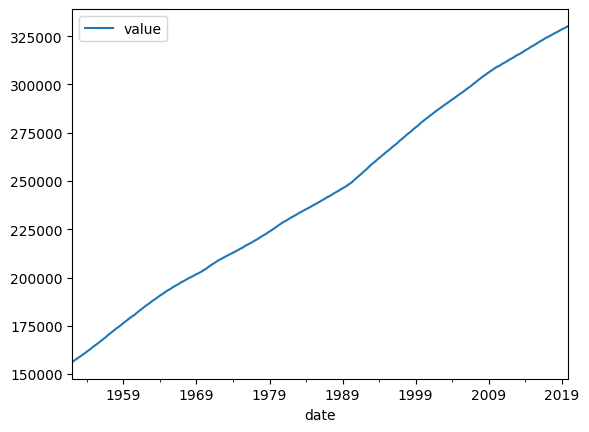

In [20]:
# Plot the time series using the DataFrame's .plot() method.
df.plot()

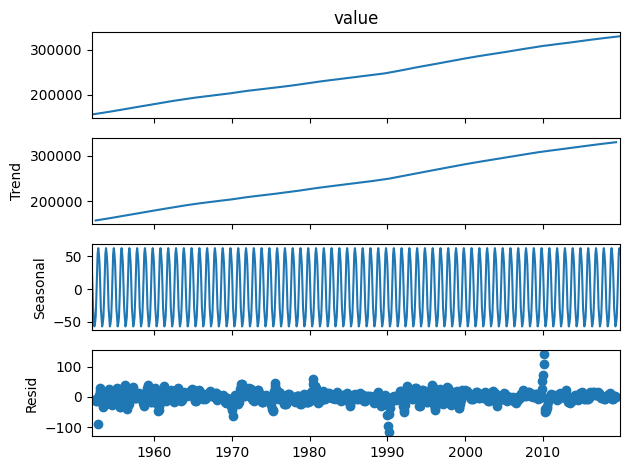

In [21]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['value'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# Run Dicky-Fuller test
result = adfuller(df['value'])

In [24]:
# Print test statistic
print(result)

(-0.6653174110243468, 0.8555297778919715, 17, 798, {'1%': -3.4385711275998583, '5%': -2.8651686574447375, '10%': -2.568702230639255}, 6593.486797606457)


In [25]:
# Make it stationary Take the first difference of the data
df_diff = df.diff().dropna()

In [26]:
# Run Dicky-Fuller test
result = adfuller(df_diff['value'])

In [27]:
# Print test statistic
print(result)

(-2.009895421289255, 0.2822512276644568, 21, 793, {'1%': -3.438623132449471, '5%': -2.8651915799370014, '10%': -2.568714441670417}, 6580.032300639022)


In [28]:
# Make it stationary Take the second difference of the data
df_diff_2 = df_diff.diff().dropna()

In [29]:
# Run Dicky-Fuller test
result = adfuller(df_diff_2['value'])

In [30]:
# Print test statistic
print(result)

(-7.221127817898145, 2.1100121875840599e-10, 21, 792, {'1%': -3.438633612472885, '5%': -2.865196199232788, '10%': -2.5687169024206713}, 6560.129833849592)


### Use the grid search method to calculate the parameter p and q

In [31]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = ARIMA(df_diff_2, order=(p,2,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

0 0 None None
0 1 None None
0 2 None None
1 0 None None
1 1 None None
1 2 None None
2 0 None None
2 1 None None
2 2 None None


As the data is not stationary, the data has to convert stationary by using the difference method twice. Even though the range is increased this method does not give a suitable value for the p & q

In [32]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

Empty DataFrame
Columns: [p, q, AIC, BIC]
Index: []
Empty DataFrame
Columns: [p, q, AIC, BIC]
Index: []


### ACF and PACF plots

In [33]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

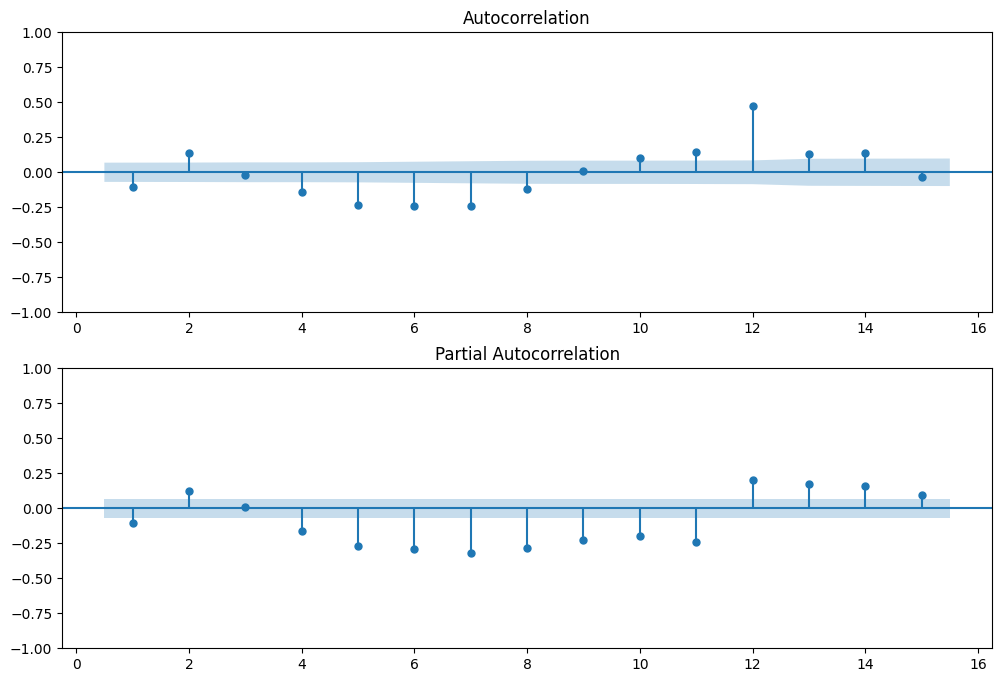

In [34]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff_2, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff_2, lags=15, zero=False, ax=ax2)

plt.show()

## LSTM

2/2 [==============================] - 0s 3ms/step
Train Score: 3030.999 RMSE
Test Score: 392.515 RMSE

KPI Results:
Bias: 43.84976581695372
Mean Absolute Error: 1889.624612561425
Root Mean Squared Error: 2920.999557504015
Mean Squared Error: 8532238.414938651
Mean Absolute Percentage Error: 0.8898752300496112
Prediction Accuracy: 99.22512493850178


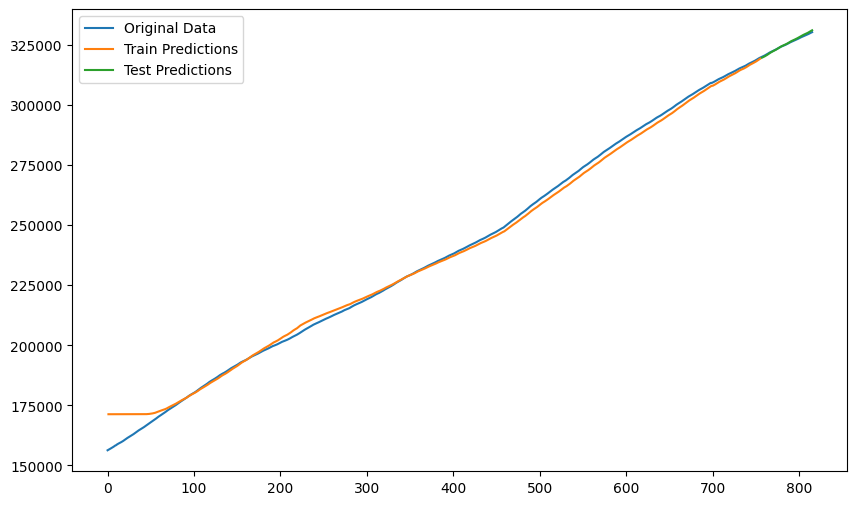

In [38]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

def calculate_kpis(actual, predicted):
    def bias(actual, predicted):
        return np.mean(predicted - actual)
    
    def mean_absolute_error(actual, predicted):
        return np.mean(np.abs(predicted - actual))
    
    def root_mean_squared_error(actual, predicted):
        return np.sqrt(np.mean(np.square(predicted - actual)))
    
    def mean_squared_error(actual, predicted):
        return np.mean(np.square(predicted - actual))
    
    def mean_absolute_percentage_error(actual, predicted):
        return np.mean(np.abs((actual - predicted) / actual)) * 100
    
    bias_value = bias(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = root_mean_squared_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    accuracy = prediction_accuracy(actual, predicted)
    
    return {
        'Bias': bias_value,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'Mean Squared Error': mse,
        'Mean Absolute Percentage Error': mape,
        'Prediction Accuracy': accuracy
    }

# Load your data
df = pd.read_csv('POP.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Scaling the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split into train and test (as in original code)
train = df_scaled[:-60,:]
test = df_scaled[-60:,:]

# Building the 2D array for supervised learning
def create_data(sequence, time_steps):
    data_X, data_Y = [], []
    for i in range(len(sequence)-time_steps):
        data_X.append(sequence[i:i+time_steps])
        data_Y.append(sequence[i+time_steps])
    return np.array(data_X), np.array(data_Y)

time_steps = 1

# Apply the 2D array function to train and test datasets
train_X, train_Y = create_data(train, time_steps)
test_X, test_Y = create_data(test, time_steps)

# transform input from [samples, features] to [samples, timesteps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Build the LSTM Model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(train_X, train_Y, batch_size=32, epochs=100, verbose=0)

# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform(train_Y)
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform(test_Y)

# Calculate root mean squared error
train_score = math.sqrt(mean_squared_error(train_Y, train_predict[:,0]))
print('Train Score: %.3f RMSE' % train_score)
test_score = math.sqrt(mean_squared_error(test_Y, test_predict[:,0]))
print('Test Score: %.3f RMSE' % test_score)

# Calculate KPIs
kpi_results = calculate_kpis(np.concatenate((train_Y, test_Y)), np.concatenate((train_predict, test_predict)))
print("\nKPI Results:")
for kpi, value in kpi_results.items():
    print(f"{kpi}: {value}")

# Shifting train predictions for plotting
train_plot = np.empty_like(df_scaled)
train_plot[:, :] = np.nan
train_plot[time_steps:len(train_predict)+time_steps, :] = train_predict

# Shifting test predictions for plotting
test_plot = np.empty_like(df_scaled)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_steps*2):len(train_predict)+(time_steps*2)+len(test_predict), :] = test_predict

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df_scaled), label='Original Data')
plt.plot(train_plot, label='Train Predictions')
plt.plot(test_plot, label='Test Predictions')
plt.legend()
plt.show()